# Section A: An Intro to Machine Learning

<img src="pic7.png" width="700">

https://www.javatpoint.com/machine-learning

## Machine Learning

![](ml_map.png)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Supervised Machine Learning

<img src="pic1.png" width="800">

https://karthikvegeta.medium.com/welcome-to-the-hood-of-machine-learning-199dd31f39e6

## Classification vs. Regression: Weather Forecasting

<img src="pic2.jpeg" width="700">

https://medium.com/@ali_88273/regression-vs-classification-87c224350d69

## Supervised Machine Learning: Flowchart

<br>
<img src="sml.png">

## Fruits Classifier?

▪ A multiclass classification task: To predict whether a fruit is an apple, orange or grapes.

<img src="features.png" width="700">

## Binary Classification

▪ A binary classification task: To predict whether an animal is a cat or not.

<img src="pic8.png" width="600">

https://towardsdatascience.com/analytics-building-blocks-binary-classification-d205890314fc

## Text Classification

▪ Logistic Regression

▪ Naive Bayes

▪ Comparing Methods: Classification Metrics

# Section B: Classification with Logistic Regression

## Classification Task: Detection of spam emails

<img src="pic4.png" width="500">

https://developers.google.com/machine-learning/guides/text-classification

## Walk-through Examples Before Data Pre-processing

### Normal Function

In [30]:
# Create a normal function that identifies an even number
def even(num):
    return num % 2 == 0

nums = [5, 10]

print(nums[0], "is even:", even(nums[0]))
print(nums[1], "is even:", even(nums[1]))

5 is even: False
10 is even: True


In [31]:
print(type(even))

<class 'function'>


### Python Lambda

▪ Python lambda functions are **small, anonymous functions** defined using the **lambda** keyword.

<img src="pic9.png" width="450">

https://www.scaler.com/topics/how-to-use-lambda-functions-in-python/

### Lambda Function \#1

In [32]:
# Create a lambda function that identifies an even number
result = lambda num: num % 2 == 0

nums = [5, 10]

print(nums[0], "is even:", result(nums[0]))
print(nums[1], "is even:", result(nums[1]))

5 is even: False
10 is even: True


In [33]:
print(type(result))

<class 'function'>


### Lambda Function \#2

In [34]:
# Create and use a lambda function that multiplies two numbers
result = lambda a, b : a * b

print(result(5, 6))

30


<span style = "color:red">
    
**Exercise \#1: Create and use a lambda that takes two strings as input and returns the longest one with the use of format().** 

<u>Expected output:</u><br> 
Please enter the 1st string: Monday<br>
Please enter the 2nd string: Tuesday<br>
'Tuesday' is a longer string.
    
</span>

### Invoking Functions with and without Parentheses

▪ When we call a function with parentheses, the function gets execute and returns the result to the callable.

▪ When we call a function without parentheses, a function reference is sent to the callable rather than executing the function itself.

https://www.geeksforgeeks.org/python-invoking-functions-with-and-without-parentheses/

### Example 1

In [35]:
def func_A():
    print("Function A")

def func_B(func):
    print("Function B")

In [36]:
func_B(func_A())

Function A
Function B


In [37]:
def func_A():
    print("Function A")

def func_B(func):
    print("Function B")
    return func()

In [38]:
func_B(func_A)

Function B
Function A


### Example 2

https://stackoverflow.com/questions/21785933/what-does-it-mean-when-the-parentheses-are-omitted-from-a-function-or-method-cal

In [39]:
def multiplication(a, b):
    return a * b

def addition(a, b):
    return a + b

def do(operation, a, b):
    return operation(a, b)

print(do(addition, 2, 3))
print(do(multiplication, 2, 3))

5
6


### Example 3

In [40]:
import re

text = "I love AVENGER movies, especially The Endgame."

def lowercase(match_obj):
    return match_obj.group(0).lower()

clean_text = re.sub(r"\b[A-Z]+\b", lowercase, text)
print(clean_text)

i love avenger movies, especially The Endgame.


### Pandas Series map()

▪ The **map()** function is used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.

https://www.w3resource.com/pandas/series/series-map.php

In [41]:
def multiplication(num):
    return num * num

output = map(multiplication, [1, 2, 3, 4, 5])
output

In [42]:
print(type(output))

<class 'map'>


In [43]:
output = list(map(multiplication, [1, 2, 3, 4, 5]))
output

[1, 4, 9, 16, 25]

In [44]:
print(type(output))

<class 'list'>


<span style = "color:red">
    
**Exercise \#2: Write python code that converts a list of integers into a list of words which consists of either "even" or "odd" that indicates whether an integer is an even or odd number with the use of lambda function and map().** 

</span>

## Step 1: Reading Dataset 

▪ Make sure the data in **spam.txt** is labeled data.

### Loading Data into a DataFrame

In [45]:
import pandas as pd

df = pd.read_table('spam.txt', encoding = 'windows-1252')
df

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [46]:
df = pd.read_table('spam.txt', encoding = 'windows-1252', header = None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Adding New Labels to Data

In [47]:
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### reindex()

▪ The **reindex()** method allows you to change the row indexes, and the columns labels.

<span style = "color:red">
    
**Exercise \#3: Write python code that swaps the "label" and "text" columns.** 

</span>

## Step 2: Exploratory Data Analysis (EDA) 

▪ **EDA** is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.

https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

### info()

▪ The **info()** function prints basic information about the DataFrame.

▪ The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [48]:
df.info() #every item have value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### dtype

▪ The **dtype** attribute returns a series with the data type of each column.

In [49]:
df.dtypes

label    object
text     object
dtype: object

### describe() 

▪ The **describe()** function describes the data with descriptive statistics.

In [50]:
df.describe()

,label,text
count,5572,5572
unique,2,5170
top,ham,"Sorry, I'll call later"
freq,4825,30


### isnull()

▪ The **isnull()** function returns a Series with True and False values that describe which rows in the DataFrame contains null value and not.

In [51]:
df.isnull()

,label,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


### sum()

▪ The **sum()** function adds all values in each column and returns the sum for each column.

In [52]:
df.isnull().sum()

label    0
text     0
dtype: int64

### nunique()

▪ The **nunique()** function returns the number of unique values for each column.

In [53]:
df.nunique()

label       2
text     5170
dtype: int64

### unique()

▪ The **unique()** function is used when we deal with a single column of a DataFrame and returns all unique elements of a column.

In [54]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [55]:
df['text'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

### duplicated()

▪ The **duplicated()** function returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not.

In [56]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [57]:
df.duplicated().sum()

402

### head()

▪ The **head()** function returns the first 5 records (default value) for visualization purpose.

In [58]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df[df['label'] == 'ham'].head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [60]:
df[df['label'] == 'spam'].head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


## Step 3: Data Pre-processing 

▪ Tasks: 1) Numbers removal, 2) Punctuation removal, and 3) Lowercase conversion

### re.sub()

<img src="regex_sub.jpg" width="300">

https://lzone.de/examples/Python%20re.sub

In [61]:
import re

# Remove numbers
x_number = lambda x: re.sub(r"\w*\d\w*", '', x)

In [62]:
import string

# Remove punctuation and capital letters
x_punc_upper = lambda x: re.sub('[%s]' %(string.punctuation), '', x.lower())

In [63]:
df['text'] = df.text.map(x_number).map(x_punc_upper)

In [64]:
df['text'] = df.text.map(x_number)
df['text'] = df.text.map(x_punc_upper)

In [65]:
# After preprocessing the data...
df.head()

,label,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


## Step 4: Splitting Data into Input and Output

▪ **Input**: Features, Predictors, Independent Variables, X's 
    
▪ **Output**: Label, Outcome, Dependent Variable, Y
    
<img src="input_output.png" width="500">

In [66]:
df.head()

,label,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [67]:
# Inputs to be fed into the model
X = df.text

# Output of the model
y = df.label 

In [68]:
X.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: text, dtype: object

In [69]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

### Datraframe vs. Series

▪ A **DataFrame** is a multi-dimensional table made up of a collection of **Series**.

<img src="series-and-dataframe.png" width="500">

In [70]:
print(type(X))
print(len(X))

<class 'pandas.core.series.Series'>
5572


In [71]:
print(type(y))
print(len(y))

<class 'pandas.core.series.Series'>
5572


## Model Fitting

▪ **Model fitting** is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. 

<img src="model_fitting.png" width="500">

▪ The **generalization of a model** to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.

<img src="pic5.png">

▪ We need to closely watch model loss and accuracy to decide how the model is fitted to the dataset:

<img src="ori.png" width="850">

https://www.baeldung.com/cs/ml-underfitting-overfitting#2-detecting-underfitting

### Underfitting

▪ **Underfitting** occurs when the machine learning model is not well-tuned to the training set. 

▪ The resulting model is not capturing the relationship between input and output well enough. Therefore, it doesn't produce accurate predictions, even for the training dataset. 

<img src="under.png" width="850">

### Overfitting

▪ **Overfitting** happens when we train a machine learning model too much tuned to the training set. 

▪ As a result, the model learns the training data too well, but it can't generate good predictions for unseen data. 

<img src="over.png" width="850">

### How to Detect Overfitting?

▪ One way to detect overfitting is by dividing dataset into **training data** and **testing data** randomly.

▪ A model is fitted on the training data and it is tested on the testing data; this way, we can see if the model generalizes well.

<img src="training-data-testing-data.png" width="550">

▪ In general, the training data and testing data are split into either an 80:20 ratio or an 70:30 ratio.

<img src="ml-with-training.png" width="550">

### Training Data vs. Validation Data vs. Testing Data

<img src="splitting-data-set.png" width="550">

https://labelyourdata.com/articles/machine-learning-and-training-data

## Step 5: Splitting Data into Training Data and Test Data

### train_test_split()

▪ X: independent variable(s)

▪ y: dependent variable

▪ test size = 30% of observations, which means training size = 70% of observations

▪ random state = 42, so we all get the same random train / test split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

![](pic6.png)

In [73]:
X_train.shape

(3900,)

In [74]:
X_train.head()

708             quite late lar ard  anyway i wun b drivin
4338                         on a tuesday night r u  real
5029    go chase after her and run her over while shes...
4921       g says you never answer your texts confirmdeny
2592            still work going onit is very small house
Name: text, dtype: object

In [75]:
y_train.shape

(3900,)

In [76]:
y_train.head()

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
Name: label, dtype: object

In [77]:
X_test.shape

(1672,)

In [78]:
y_test.shape

(1672,)

## Step 6: Numerically Encoding the Input Data

![](pic10.png)

https://www.educative.io/answers/countvectorizer-in-python

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')

X_train_cv = cv.fit_transform(X_train).toarray()

print(X_train_cv.shape) # 6644 is unit words

(3900, 6644)


In [80]:
print(X_train_cv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [81]:
# Transform test data using the same vocabularies
X_test_cv = cv.transform(X_test).toarray() 

print(X_test_cv.shape)

(1672, 6644)


## Step 7: Fitting The Model and Predicting Outcomes

In [82]:
# Use a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the model
lr.fit(X_train_cv, y_train)

LogisticRegression()

In [83]:
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_cv = lr.predict(X_test_cv)

# The output is all of the predictions/ labels
y_pred_cv 

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

## Step 8: Evaluating The Model

▪ A **confusion matrix** shows the ways in which a classification model is confused when it makes predictions.

▪ The number of correct and incorrect predictions are summarized with count values and broken down by each class.

<img src="confusion_matrix3.png" width="400">

https://machinelearningmastery.com/confusion-matrix-machine-learning/

### Confusion Matrix: Example

▪ Intrepret the given confusion matrix and answer the following questions:

\>>> How many samples are used in total?

\>>> How many samples are labelled with **Yes** and **No**?

\>>> How many samples are predicted as **Yes**?

\>>> How many samples are predicted as **Yes** correctly and wrongly?

\>>> How many samples are predicted as **No**?

\>>> How many samples are predicted as **No** correctly and wrongly?

<img src="confusion_matrix2.png" width="400">

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cv)
cm

array([[1448,    0],
       [  28,  196]], dtype=int64)

<Axes: >

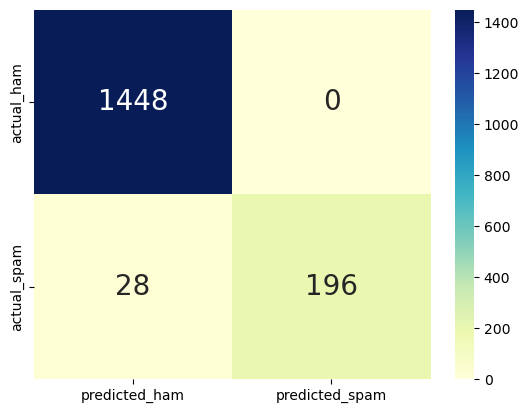

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(cm, yticklabels=['actual_ham', 'actual_spam'], xticklabels=['predicted_ham', 'predicted_spam'], 
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

In [86]:
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

<img src="confusion_matrix3.png" width="400">

In [87]:
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
precision = round((true_pos) / (true_pos + false_pos), 3)
recall = round((true_pos) / (true_pos + false_neg), 3)
f1 = round(2 * (precision * recall) / (precision + recall), 3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

Accuracy: 0.983
Precision: 1.0
Recall: 0.875
F1 Score: 0.933


## Step 9: Demonstration with the Trained Predictive Model

https://www.jooksms.com/blog/10-examples-of-spam-text-messages/

In [108]:
example_1 = "[Name], we have recently discovered an awaiting package from [a recent month] that belongs to you! You can quickly claim ownership and confirm its delivery by accessing this link: [link]."
example_2 = "Your Apple ID has been identified as a possible security breach. To protect your account, please verify your Apple ID and password here: [link]"
example_3 = "Your Amazon account has been suspended. Please click here to reactivate your account now."

In [114]:
example = re.sub('[\d%s]' %(string.punctuation), "" , example_1.lower())
# example = re.sub('[\d%s]' %(string.punctuation), "" , example_2.lower())
# example = re.sub('[\d%s]' %(string.punctuation), "" , example_3.lower())


tempo = pd.Series(example)
sample = cv.transform(tempo).toarray()
prediction = lr.predict(sample)
prediction

array(['ham'], dtype=object)

# Section C: Classification with Naive Bayes

## Step 7: Fitting The Model and Predicting Outcomes

In [111]:
# Use a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes prediction model object
nb = MultinomialNB()

# Train the model
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [112]:
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_cv_nb = nb.predict(X_test_cv)

# The output is all of the predictions
y_pred_cv_nb 

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

## Step 8: Evaluating the Model

Accuracy: 0.985
Precision: 0.95
Recall: 0.938
F1 Score: 0.944


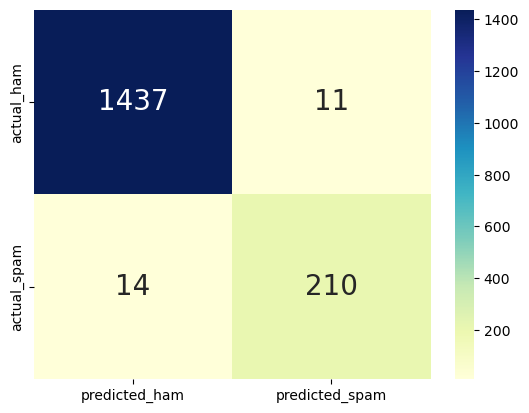

In [113]:
cm = confusion_matrix(y_test, y_pred_cv_nb)

sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
precision = round((true_pos) / (true_pos + false_pos), 3)
recall = round((true_pos) / (true_pos + false_neg), 3)
f1 = round(2 * (precision * recall) / (precision + recall), 3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

## Step 9: Demonstration with the Trained Predictive Model

In [117]:
example = re.sub('[\d%s]' %(string.punctuation), "" , example_1.lower())
# example = re.sub('[\d%s]' %(string.punctuation), "" , example_2.lower())
# example= re.sub('[\d%s]' %(string.punctuation), "" , example_3.lower())

tempo = pd.Series(example)
sample = cv.transform(tempo).toarray()
prediction = nb.predict(sample)
prediction

array(['spam'], dtype='<U4')

<span style = "color:red">
    
**Exercise \#4: Repeat the task of creating predictive models for Logistic Regression and Naive Bayes with the use of tfidf vectorizer.** 

</span>

# Section D: Classification with Other Machine Learning Algorithms

## Step 7: Fitting Different Models and Predicting Outcomes

### I. Logistic Regression

###  II. Naive Bayes

### III. SVM

### IV. Decision Tree

### V. Random Forest

### VI. KNN

## Step 8: Evaluating Predictive Models

In [91]:
# Logistic Regression

In [92]:
# Naive Bayes

In [93]:
# SVM

In [94]:
# Decision Tree

In [95]:
# Random Forest

In [96]:
# KNN

## Step 9: Demonstration with the Trained Predictive Models

In [97]:
# Logistic Regression

In [98]:
# Naive Bayes

In [99]:
# SVM

In [100]:
# Decision Tree

In [101]:
# Random Forest

In [102]:
# KNN